Realizar as importações das bibliotecas.

In [156]:
import random
import time
import matplotlib.pyplot as plt

Função para gerar a lista de diferentes tamanhos

In [157]:
def gerar_lista(tamanho):
    '''
    Gera uma lista de números inteiros aleatórios.

    Parameters:
    tamanho (int): O tamanho da lista a ser gerada.

    Returns:
    list: Uma lista contendo números inteiros aleatórios entre 0 e 100000.

    '''
    return [random.randint(0, 100000) for _ in range(tamanho + 1)]


Funções das ordenações

In [158]:
def quick_sort(array):
    '''
    Ordena uma lista de números inteiros utilizando o Quick sort.

    Parameters:
    array (list): A lista de números inteiros a ser ordenada.

    Returns:
     (list): A lista ordenada.

    '''

    if len(array) <= 1:
        return array
    else:
        pivo = array[len(array) // 2]
        esquerda = [x for x in array if x < pivo]
        direita = [x for x in array if x > pivo]
        meio = [x for x in array if x == pivo]

        return quick_sort(esquerda) + meio + quick_sort(direita) 

In [159]:
def merge_sort(array):
    '''
    Ordena uma lista de números inteiros utilizando o Merge Sort.

    Parameters:
    array (list): A lista de números inteiros a ser ordenada.

    Returns:
    None: A lista é ordenada in-place.

    '''
    if len(array) > 1:
        meio = len(array) // 2
        e = array[:meio]
        d = array[meio:]

        merge_sort(e)
        merge_sort(d)

        i = j = k = 0

        while i < len(e) and j < len(d):
            if e[i] < d[j]:
                array[k] = e[i]
                i+=1
            else:
                array[k] = d[j]
                j+=1
            k+=1

        while i < len(e):
            array[k] = e[i]
            i+=1
            k+=1
        
        while j < len(d):
            array[k] = d[j]
            j+=1
            k+=1

In [160]:
def arvore(array, n, i):
    '''
    Garante que a subárvore com raiz no índice 'i' esteja de acordo com a propriedade de um heap máximo.

    Parameters:
    array (list): A lista de números inteiros.
    n (int): O tamanho da heap.
    i (int): O índice da raiz da subárvore.

    Returns:
    None: A lista é modificada in-place para obedecer à propriedade de heap.

    '''
    maior = i
    direita = 2 * i + 2
    esquerda = 2 * i + 1

    if esquerda < n and array[esquerda] > array[maior]:
        maior = esquerda
    
    if direita < n and array[direita] > array[maior]:
        maior = direita
    
    if maior != i:
        array[i], array[maior] = array[maior], array[i]
        arvore(array, n, maior)

In [161]:
def heap_sort(array):
    '''
    Ordena uma lista de números inteiros usando utilizando o Heap Sort.

    Parameters:
    array (list): A lista de números inteiros a ser ordenada.

    Returns:
    None: A lista é ordenada in-place.

    '''
    n = len(array)

    for i in range(n // 2 - 1, -1, -1):
        arvore(array, n, i)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        arvore(array, i, 0)

Função para calcular o tempo gasto de cada ordenação.

In [162]:
def tempo(ord, array):
    '''
    Calcula o tempo gasto para cada ordenação.

    Parameters:
    ord (function)
    array (list)

    Returns:
    (float): Calculo do tempo funal menos o tempo inicial.
    '''

    inicio = time.time()
    ord(array)
    fim = time.time()
    return fim - inicio


In [163]:
def medir_tempos(tamanhos):
    '''
    Coloca em um dicionário os tempos gasto por cada tipo de ordenção para diferentes tamanhos de lista.

    Parameters:
    tamanhos (int)

    Returns:
    tempos_resultados (dict): Retorna o dicionário com o tempo gasto para cada tipo de ordenação.
    '''
    tempos_resultados = {
        "Quick sort": [],
        "Merge Sort": [],
        "Heap Sort": []
    }
    
    for tamanho in tamanhos:
        lista = gerar_lista(tamanho)
        
        lista_quick = lista.copy()
        lista_merge = lista.copy()
        lista_heap = lista.copy()
        
        tempo_quick = tempo(quick_sort, lista_quick)
        tempos_resultados["Quick sort"].append(tempo_quick)
        
        tempo_merge = tempo(merge_sort, lista_merge)
        tempos_resultados["Merge Sort"].append(tempo_merge)

        tempo_heap = tempo(heap_sort, lista_heap)
        tempos_resultados["Heap Sort"].append(tempo_heap)
    
    return tempos_resultados


Função para criar os gráficos por tempo (comparação).

In [164]:
def criar_graficos(tempos, tamanhos):
    """
    Cria e salva gráficos comparando os tempos de execução dos algoritmos de ordenação
    para cada tamanho de lista.

    Parameters:
    tempos (dict): Dicionário contendo os tempos de execução para cada algoritmo.
    tamanhos (list): Lista com os tamanhos das listas testadas.

    Returns:
    None: O gráfico é salvo como uma imagem para cada tamanho.
    """
    ordenacoes = ['Quick Sort', 'Merge Sort', 'Heap Sort']

    for i, tamanho in enumerate(tamanhos):
        tempos_bubble = tempos['Quick sort'][i]
        tempos_merge = tempos['Merge Sort'][i]
        tempos_heap = tempos['Heap Sort'][i]

        tempos_execucao = [tempos_bubble, tempos_merge, tempos_heap]

        plt.figure(figsize=(8, 5))
        plt.bar(ordenacoes, tempos_execucao, color=['red', 'orange', 'yellow'])
        plt.ylabel('Tempo de Execução em segundos.')
        plt.title(f'Comparação de Algoritmos para Lista de {tamanho} números.')

        img = f"img/lista de {tamanho}.png"
        plt.savefig(img)
        plt.show()

In [165]:
#lista500 = gerar_lista(500)
#lista5000 = gerar_lista(5000)
#lista50000 = gerar_lista(50000)

In [166]:
#lista500

In [167]:
#lista5000

In [168]:
#lista50000

In [169]:
#quick = quick_sort(lista50000)
#quick

In [170]:
#merge = merge_sort(lista5000)
#lista5000

In [171]:
#heap = heap_sort(lista500)
#lista500

In [172]:
tamanhos = [500, 5000, 50000]
tempos = medir_tempos(tamanhos)

tempos

{'Quick sort': [0.0005068778991699219,
  0.01353597640991211,
  0.10101938247680664],
 'Merge Sort': [0.001013040542602539,
  0.012022733688354492,
  0.1526174545288086],
 'Heap Sort': [0.0009992122650146484,
  0.016028404235839844,
  0.2284259796142578]}

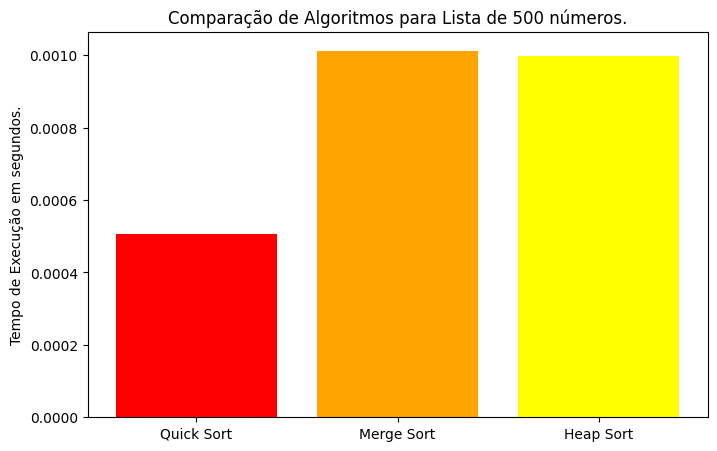

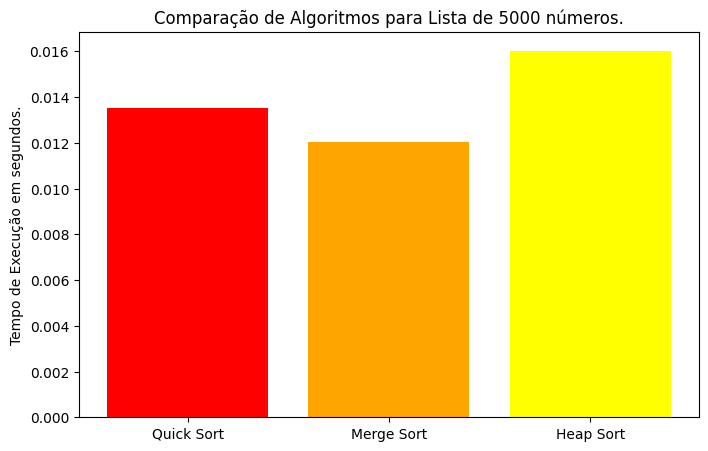

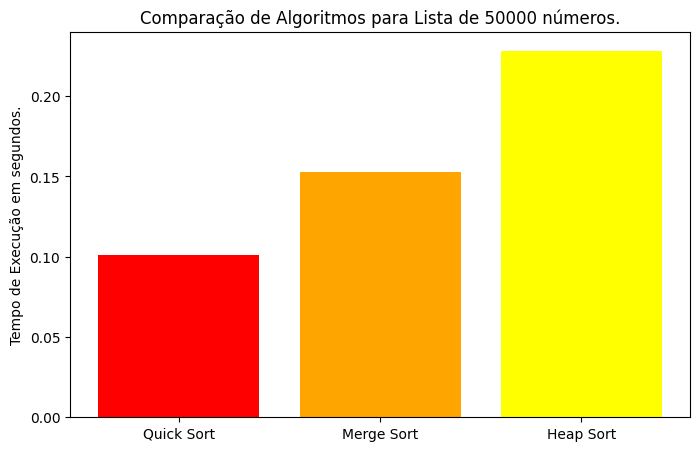

In [173]:
criar_graficos(tempos, tamanhos)